<h2 style="color:green" align="center">  Heart Disease data analysis & Machine Learning model
implementation  </h2>

### Problem Statement

- This dataset will allow us to **predict if someone has heart disease** based on their **sex, age, blood pressure** and a variety of other metrics.

### Dataset Information:

- Number of Rows : 303


- Number of Columns : 14

### Feature Column Description:

- **age** : age in years


- **sex** :


     1 = male;
     
     0 = female;
     

- **cp** : chest pain type


     1: typical angina
     
     2: atypical angina
     
     3: non-anginal pain
     
     4: asymptomatic


- **restbp** : resting blood pressure (in mm Hg on admission to the hospital)


- **chol** : serum cholestoral in mg/dl


- **fbs** : fasting blood sugar


- **restecg** : resting electrocardiographic results


     0: normal
     
     1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
     
     2: showing probable or definite left ventricular hypertrophy by Estes' criteria
     
     
- **thalach** :  maximum heart rate achieved


- **exang** : exercise induced angina

     1 = yes;
     
     0 = no
     
     
- **oldpeak** : ST depression induced by exercise relative to rest


- **slope** : the slope of the peak exercise ST segment.


     1: upsloping
     
     2: flat
     
     3: downsloping
     
     
- **ca** : number of major vessels (0-3) colored by fluoroscopy


- **thal** : this is short of thalium heart scan.

     3 = normal;
     
     6 = fixed defect;
     
     7 = reversable defe
     
     
- **target** : diagnosis of heart disease, the predicted attribute

<h2 style="color:blue" align="left"> 1. Import necessary Libraries </h2>

In [48]:
# Read Data
import numpy as np     # Linear Algebra (calculate the mean and standard deviation)
import pandas as pd    # manipulate data, data processing, load csv file I/O (e.g. pd.read_csv)

# Visualization
import seaborn as sns                  # Visualization using seaborn
import matplotlib.pyplot as plt        # Visualization using matplotlib
%matplotlib inline
import plotly                          # Visualization using Plotly
import plotly.express as px
import plotly.graph_objs as go

# style
plt.style.use("fivethirtyeight")       # Set Graphs Background style using matplotlib
sns.set_style("darkgrid")              # Set Graphs Background style using seaborn

# ML model building; Pre Processing & Evaluation
from sklearn.model_selection import train_test_split                     # split  data into training and testing sets
from sklearn.ensemble import RandomForestClassifier                      # this will make a Random Forest classificaiton
from sklearn import svm                                                  # this will make a SVM classificaiton
from sklearn.svm import SVC                                              # import SVC from SVM
from sklearn.metrics import confusion_matrix, classification_report      # this creates a confusion matrix
from sklearn.preprocessing import StandardScaler                         # Standard Scalar
from sklearn.model_selection import GridSearchCV                         # this will do cross validation
from sklearn.decomposition import PCA                                    # to perform PCA to plot the data
from sklearn.metrics import roc_curve,auc                                # ROC
import warnings                                                          # Ignore Warnings
warnings.filterwarnings("ignore")

<h2 style="color:blue" align="left"> 2. Load data </h2>

In [49]:
# Import first 5 rows
df = pd.read_csv("datasets_33180_43520_heart.csv")
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

In [159]:
# checking dimension (num of rows and columns) of dataset
df.shape

(303, 14)

### Checking for Numerical and Categorical features

In [5]:
# check dataframe structure like columns and its counts, datatypes & Null Values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
# check the datatypes
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

- Observed that **there is no categorical features** in this dataset. Only have **numerical features of int64 & float64**.

In [7]:
# Gives number of data points in each variable
df.count()

age         303
sex         303
cp          303
trestbps    303
chol        303
fbs         303
restecg     303
thalach     303
exang       303
oldpeak     303
slope       303
ca          303
thal        303
target      303
dtype: int64

<h2 style="color:blue" align="left"> 3. EDA (Exploratory Data Analysis) </h2>

- EDA is a way of **Visualizing, Summarizing and interpreting** the information that is **hidden in rows and column** format.

- Find Unwanted Columns
- Find Missing Values
- Find Features with one value
- Explore the Categorical Features
- Find Categorical Feature Distribution
- Relationship between Categorical Features and Label
- Explore the Numerical Features
- Find Discrete Numerical Features
- Relation between Discrete numerical Features and Labels
- Find Continous Numerical Features
- Distribution of Continous Numerical Features
- Relation between Continous numerical Features and Labels
- Find Outliers in numerical features
- Explore the Correlation between numerical features

### 1. Find Unwanted Columns

- There is no unwanted column present in given dataset to remove.

     EX: ID, S.No etc

### 2. Find Missing Values

- Checking missing values by below methods:


     1. df.isnull().sum()
     
          - It returns null values for each column
          
     2. isnull().any()
     
          - It returns True if column have NULL Values
          
          - It returns False if column don't have NULL Values
          
     3. Heatmap()
     
          - Missing value representation using heatmap.

In [9]:
# Listing Number of missing values by feature column wise.
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

- All **features** returned as **"No Null Values".**

In [10]:
# any() check null values by columns
df.isnull().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

- It shows all columns as False means no NULL Values present in dataset.

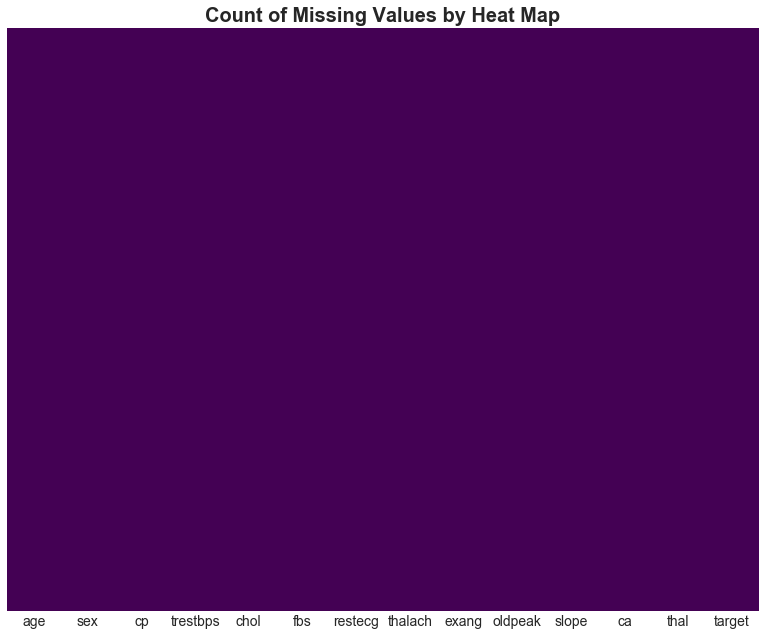

In [11]:
# Missing value representation by Heatmap
plt.figure(figsize=(12,10))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.xticks(fontsize=14)
plt.title('Count of Missing Values by Heat Map', fontsize=20, fontweight = 'bold')
plt.show()

- From graph understood that there is **no missing values** in this dataset.

### 3. Find Features with one value

In [12]:
for column in df.columns:
    print(column,df[column].nunique())

age 41
sex 2
cp 4
trestbps 49
chol 152
fbs 2
restecg 3
thalach 91
exang 2
oldpeak 40
slope 3
ca 5
thal 4
target 2


- All columns have **more than 1 unique value.** No feature found with one value.


- There could be chance of only one category in a particular feature. In Categorical features, suppose gender column we have only one value ie male.Then there is no use of that feature in dataset. 

#### To find Number of Categories in each Feature

In [13]:
# feature cp
df.cp.value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

- **4 categories** in column "cp(Chest Pain)"

In [14]:
# feature target
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

- **2 categories** in column "target"

In [15]:
# feature sex
df.sex.value_counts() # Number of Category's in sex

1    207
0     96
Name: sex, dtype: int64

- **2 categories** in column "sex"

In [16]:
# feature slope
df.slope.value_counts()

2    142
1    140
0     21
Name: slope, dtype: int64

- **3 categories** in column "slope"

In [17]:
# feature restecg
df.restecg.value_counts()

1    152
0    147
2      4
Name: restecg, dtype: int64

- **3 categories** in column "restecg"

In [18]:
# feature exang
df.exang.value_counts()

0    204
1     99
Name: exang, dtype: int64

- **2 categories** in column "exang"

In [19]:
# feature thal
df.thal .value_counts()

2    166
3    117
1     18
0      2
Name: thal, dtype: int64

- **4 categories** in column "thal"

### 4. Explore the Categorical Features

In [20]:
categorical_features = [feature for feature in df.columns if df[feature].dtypes=='O']
categorical_features

[]

- There is no categorical features in this dataset.

In [21]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(df[feature].unique())))

- Steps **5 to 7 not required** since there is **no categorical features**.

### 8. Explore the Numerical Features

In [22]:
numerical_features = df.select_dtypes(exclude='object')
numerical_features

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1       1  
1        0   0     2       1  
2        2   0     2       1  
3        2   0     2       1  
4        2   0     2       1  
..     ...  ..   ...     ...  
298      1   0     3       0  
299      1   0     3       0  
300      1   2     3       0  
301      1   1     3       0  
302      1   1     2       0  

[303 rows x 14 columns]

### 9. Find Discrete Numerical Features

In [23]:
discrete_feature=[feature for feature in numerical_features if len(df[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 9


### 10. Find Continous Numerical Features

In [24]:
continuous_features=[feature for feature in numerical_features if feature not in discrete_feature+['target']]
print("Continuous feature Count {}".format(len(continuous_features)))

Continuous feature Count 5


In [25]:
continuous_features

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

### 11. Distribution of Continous Numerical Features

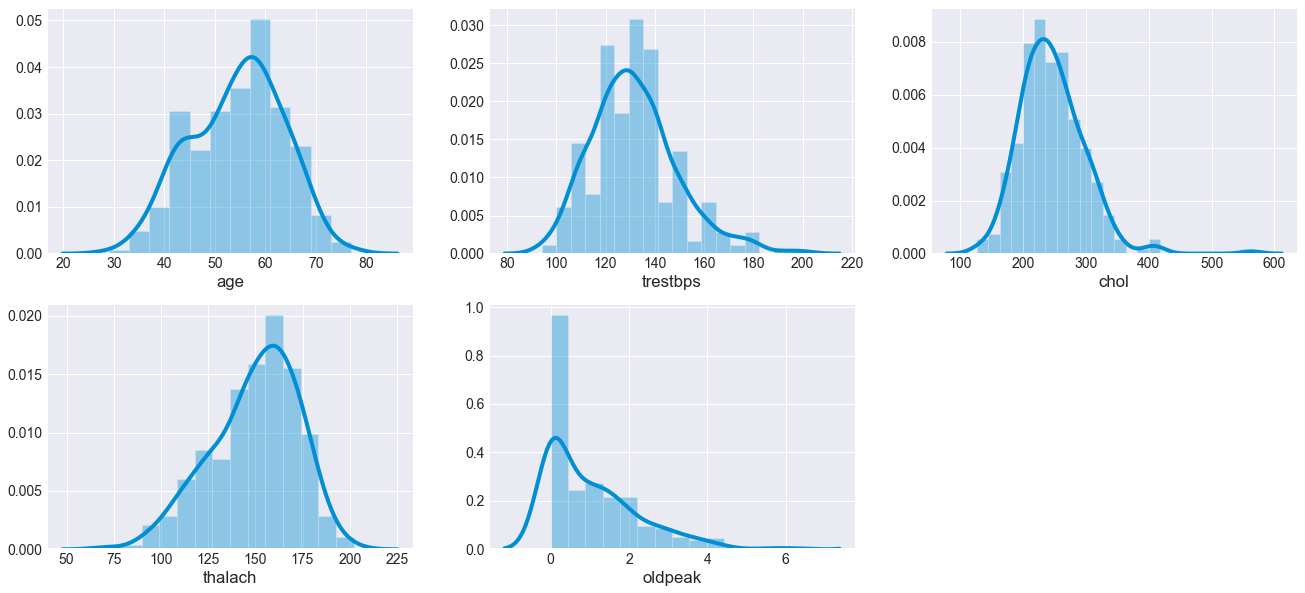

In [26]:
# plot a univariate distribution of continues observations
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for continuous_feature in continuous_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.distplot(df[continuous_feature])
    plt.xlabel(continuous_feature)
    plotnumber+=1
plt.show()

- it seems all continuous features are not normally distributed


- **Age, chol, trestbps & oldpeak** are **right skewed**


- **thalach** is **left skewed**.

### 12. Relation between Continous numerical Features and Labels

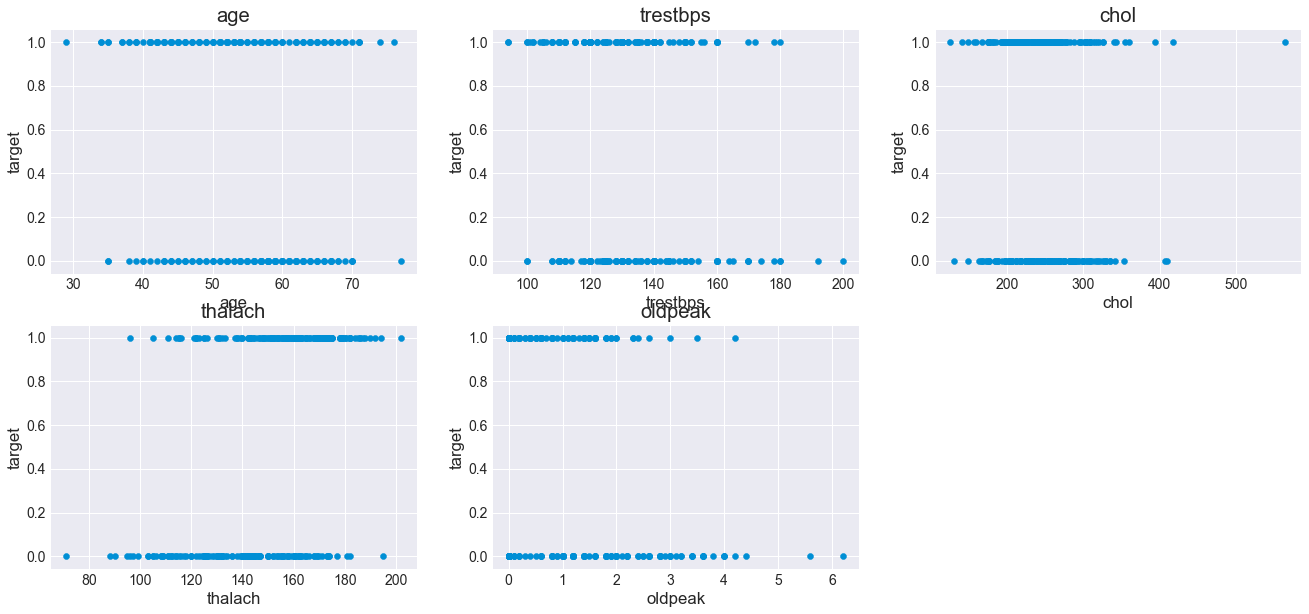

In [27]:
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for feature in continuous_features:
    data=df.copy()
    ax = plt.subplot(12,3,plotnumber)
    plt.scatter(data[feature],data['target'])
    plt.xlabel(feature)
    plt.ylabel('target')
    plt.title(feature)
    plotnumber+=1
plt.show()

### 13. Find Outliers in numerical features

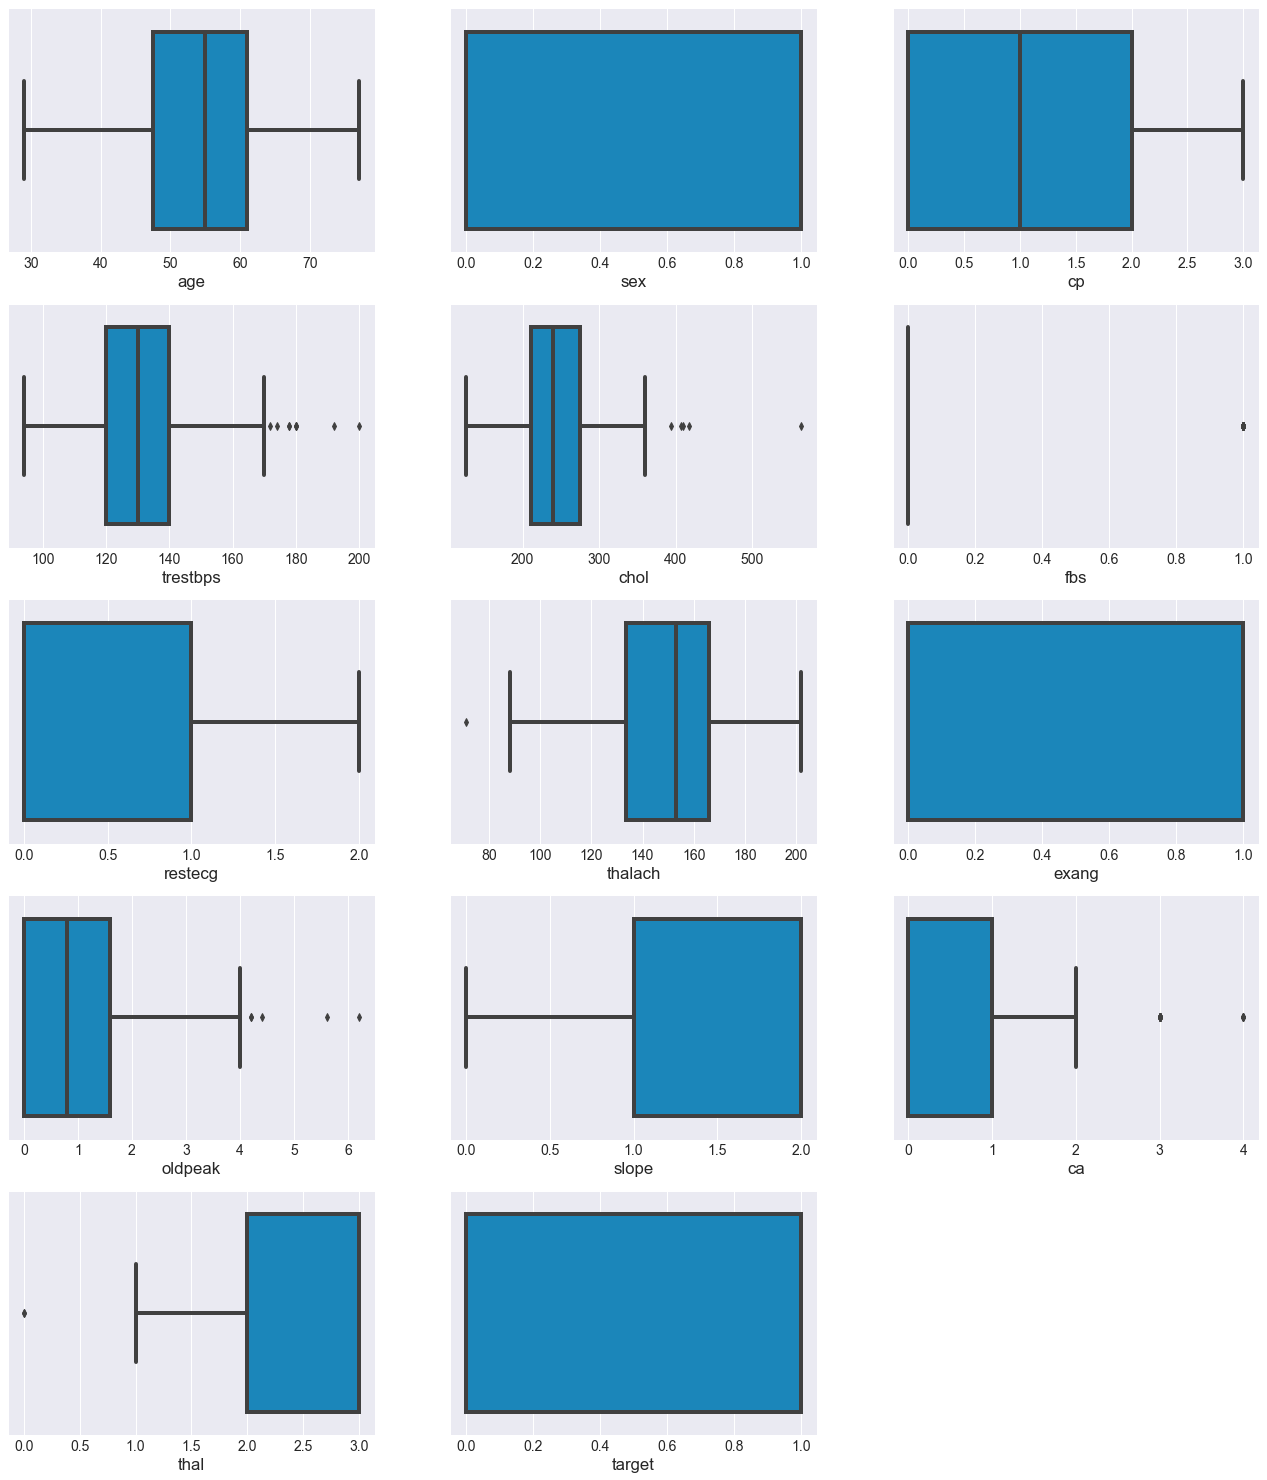

In [28]:
# boxplot on numerical features to find outliers
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for numerical_feature in numerical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(df[numerical_feature])
    plt.xlabel(numerical_feature)
    plotnumber+=1
plt.show()

- Found **outliers** in **"trestbps", "chol", "fbs", "thalach", "oldpeak", "ca" & "thal"**.

### 14. Explore the Correlation between numerical features

In [27]:
## Checking for correlation
df.corr()

age       sex        cp  trestbps      chol       fbs  \
age       1.000000 -0.098447 -0.068653  0.279351  0.213678  0.121308   
sex      -0.098447  1.000000 -0.049353 -0.056769 -0.197912  0.045032   
cp       -0.068653 -0.049353  1.000000  0.047608 -0.076904  0.094444   
trestbps  0.279351 -0.056769  0.047608  1.000000  0.123174  0.177531   
chol      0.213678 -0.197912 -0.076904  0.123174  1.000000  0.013294   
fbs       0.121308  0.045032  0.094444  0.177531  0.013294  1.000000   
restecg  -0.116211 -0.058196  0.044421 -0.114103 -0.151040 -0.084189   
thalach  -0.398522 -0.044020  0.295762 -0.046698 -0.009940 -0.008567   
exang     0.096801  0.141664 -0.394280  0.067616  0.067023  0.025665   
oldpeak   0.210013  0.096093 -0.149230  0.193216  0.053952  0.005747   
slope    -0.168814 -0.030711  0.119717 -0.121475 -0.004038 -0.059894   
ca        0.276326  0.118261 -0.181053  0.101389  0.070511  0.137979   
thal      0.068001  0.210041 -0.161736  0.062210  0.098803 -0.032019   
target   -0.225439 -0.280937  0.433798 -0.144931 -0.085239 -0.028046   

           restecg   thalach     exang   oldpeak     slope        ca  \
age      -0.116211 -0.398522  0.096801  0.210013 -0.168814  0.276326   
sex      -0.058196 -0.044020  0.141664  0.096093 -0.030711  0.118261   
cp        0.044421  0.295762 -0.394280 -0.149230  0.119717 -0.181053   
trestbps -0.114103 -0.046698  0.067616  0.193216 -0.121475  0.101389   
chol     -0.151040 -0.009940  0.067023  0.053952 -0.004038  0.070511   
fbs      -0.084189 -0.008567  0.025665  0.005747 -0.059894  0.137979   
restecg   1.000000  0.044123 -0.070733 -0.058770  0.093045 -0.072042   
thalach   0.044123  1.000000 -0.378812 -0.344187  0.386784 -0.213177   
exang    -0.070733 -0.378812  1.000000  0.288223 -0.257748  0.115739   
oldpeak  -0.058770 -0.344187  0.288223  1.000000 -0.577537  0.222682   
slope     0.093045  0.386784 -0.257748 -0.577537  1.000000 -0.080155   
ca       -0.072042 -0.213177  0.115739  0.222682 -0.080155  1.000000   
thal     -0.011981 -0.096439  0.206754  0.210244 -0.104764  0.151832   
target    0.137230  0.421741 -0.436757 -0.430696  0.345877 -0.391724   

              thal    target  
age       0.068001 -0.225439  
sex       0.210041 -0.280937  
cp       -0.161736  0.433798  
trestbps  0.062210 -0.144931  
chol      0.098803 -0.085239  
fbs      -0.032019 -0.028046  
restecg  -0.011981  0.137230  
thalach  -0.096439  0.421741  
exang     0.206754 -0.436757  
oldpeak   0.210244 -0.430696  
slope    -0.104764  0.345877  
ca        0.151832 -0.391724  
thal      1.000000 -0.344029  
target   -0.344029  1.000000

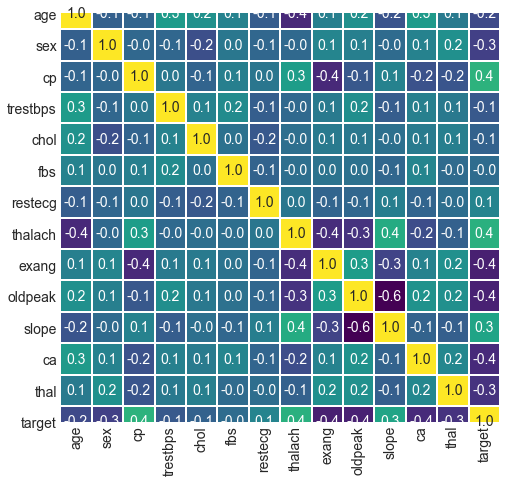

In [28]:
## Checking for correlation
cor_mat=df.corr()
fig = plt.figure(figsize=(15,7))
sns.heatmap(cor_mat, annot=True, cbar=False, cmap='viridis', fmt='.1f', linewidth=1, square=True)
plt.show()

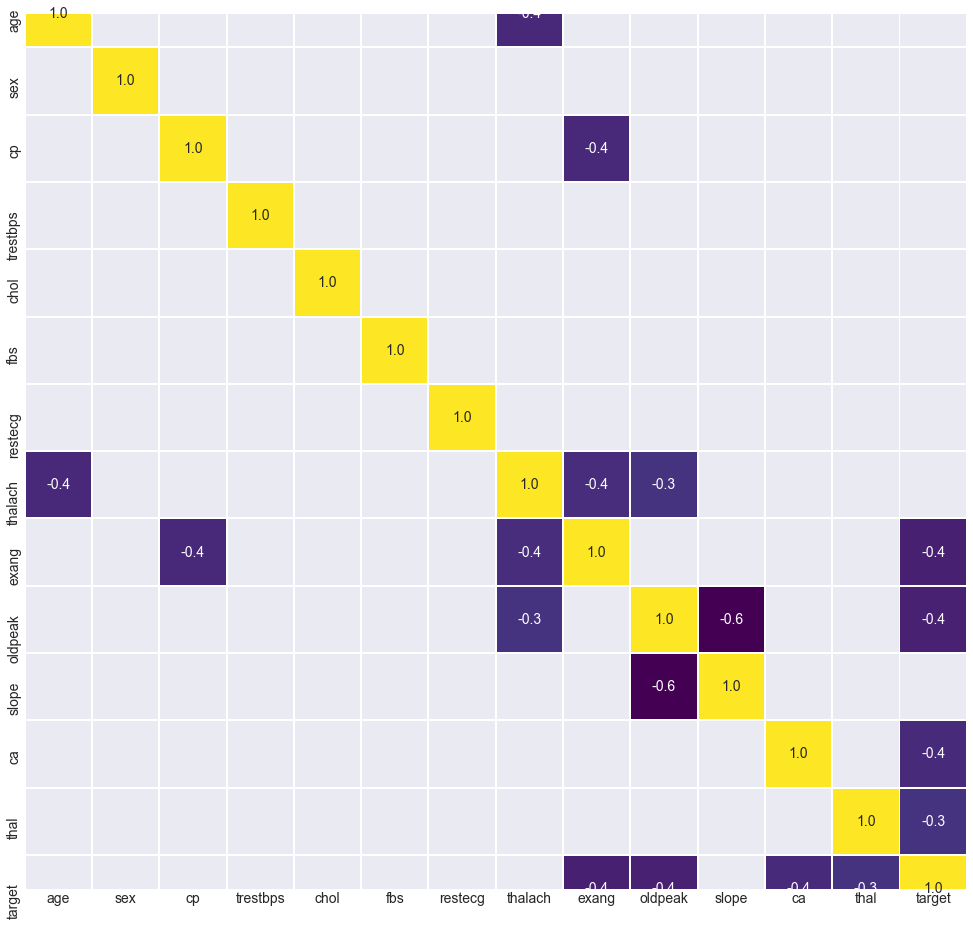

In [29]:
# highlight only features have correlation between 0.5 and -0.3
plt.figure(figsize=(16,15))
corr = df.corr()
sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.3)], annot=True, cbar=False,
                                 cmap='viridis', linewidth=1, fmt='.1f', square=True)

### 15. Descriptive statistics

In [30]:
# descriptive statistics (numerical columns)
df.describe()

age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.905161    0.469794    1.161075    0.616226    1.022606   
min      0.000000   71.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000  133.500000    0.000000    0.000000    1.000000    0.000000   
50%      1.000000  153.000000    0.000000    0.800000    1.000000    0.000000   
75%      1.000000  166.000000    1.000000    1.600000    2.000000    1.000000   
max      2.000000  202.000000    1.000000    6.200000    2.000000    4.000000   

             thal      target  
count  303.000000  303.000000  
mean     2.313531    0.544554  
std      0.612277    0.498835  
min      0.000000    0.000000  
25%      2.000000    0.000000  
50%      2.000000    1.000000  
75%      3.000000    1.000000  
max      3.000000    1.000000

- for **each feature** it provides below:


     1. count       --->  total no of data points
     
     2. statistics  --->  mean, standard deviation
     
     3. min & max   --->  values of feature
     
     4. percentile  --->  25%, 50%, 75%

<h2 style="color:green" align="left"> 5. Data Visualization </h2>

- Used below **visualisation libraries**


     1. Matplotlib

     2. Seaborn (statistical data visualization)
  
     3. Plotly

### 1. Categorical

- Categorical data :


     1. Numerical Summaries

     2. Histograms

     3. Pie Charts


### 2. Univariate Analysis

- Univariate Analysis : data consists of **only one variable (only x value)**.


     1. Line Plots / Bar Charts

     2. Histograms

     3. Box Plots 
     
     4. Count Plots
     
     5. Descriptive Statistics techniques
     
     6. Violin Plot

### Histogram

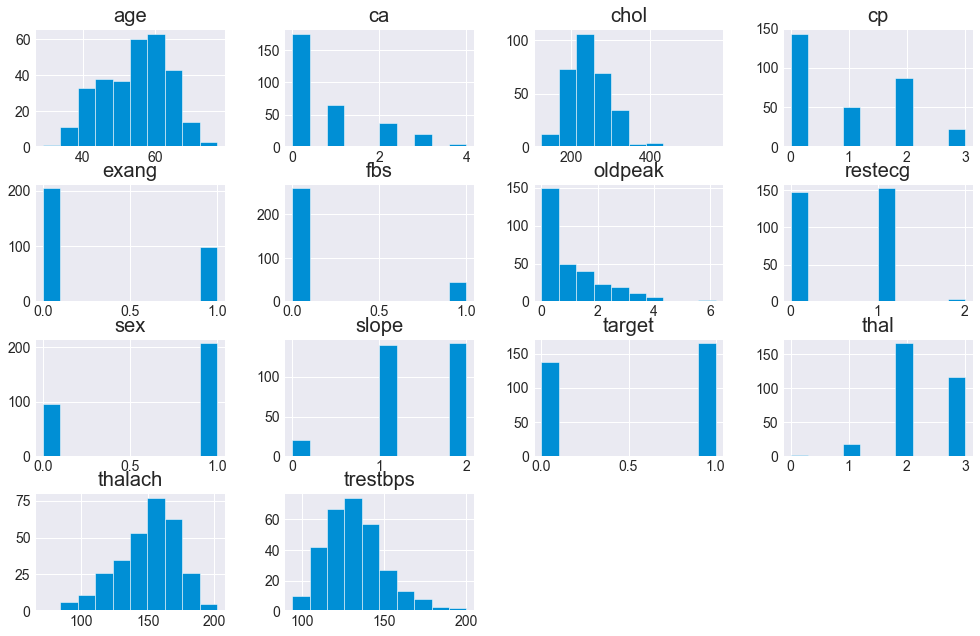

In [31]:
# Histogram for dataset
df.hist(figsize = (15,10))
plt.show()

### Box Plot

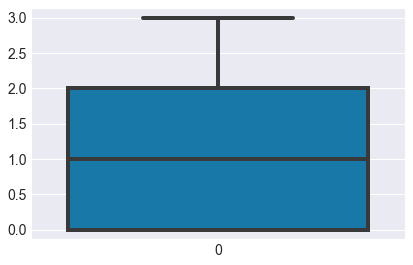

In [32]:
# Box Plot used to find out the outliers in feature column of "ConfirmedCases"
plt.figure(figsize=(6,4))
sns.boxplot(data=df['cp'], palette='winter')

### Count Plot

- Show the counts of observations in each categorical bin using bars

### a. Sex Unique Value Counts

1    207
0     96
Name: sex, dtype: int64


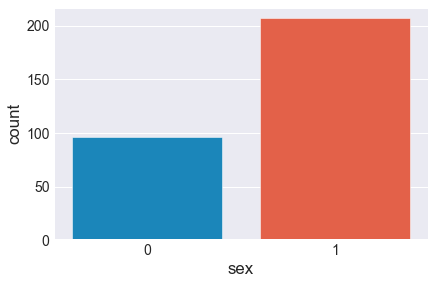

In [29]:
# value_counts(), total counts in sex
print(df['sex'].value_counts())
sns.countplot(x='sex', data=df)
plt.show()

- Total males of 207

- Total females of 96

### b. Exang Unique Value Counts

0    204
1     99
Name: exang, dtype: int64


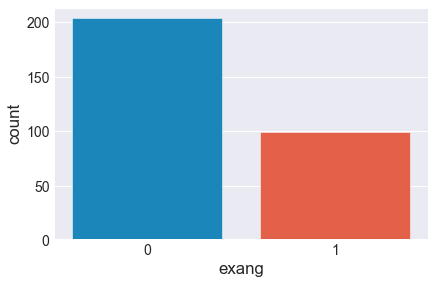

In [31]:
# value_counts(), total counts in Exang
print(df['exang'].value_counts())
sns.countplot(x='exang', data=df)
plt.show()

- exang : exercise induced angina


     - Yes : 99
     - No  : 204

### c. Target Unique Value Counts

1    165
0    138
Name: target, dtype: int64


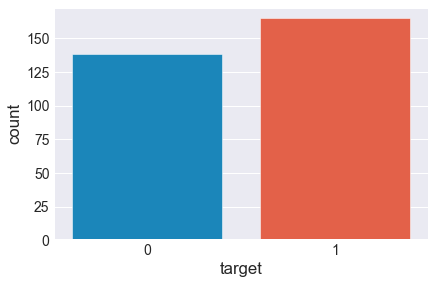

In [41]:
# value_counts(), total counts
print(df.target.value_counts())
sns.countplot(x='target', data=df)
plt.show()

- Yes : 165 (Affected by Heart disease)
- No  : 138 (Not Affected by Heart disease)

### d. Value Counts of "cp" w.r.t "Sex"

0    143
2     87
1     50
3     23
Name: cp, dtype: int64
1    207
0     96
Name: sex, dtype: int64


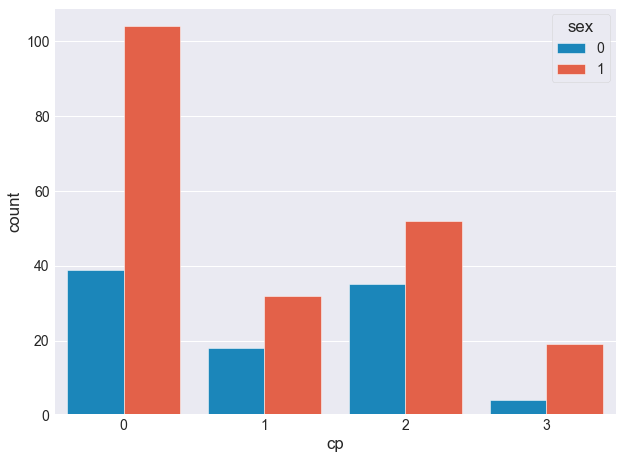

In [32]:
# Count Plot for "Chest Pain" & "sex"
print(df['cp'].value_counts())
print(df['sex'].value_counts())
plt.figure(figsize=(9,7))
sns.countplot(x="cp", data=df, hue="sex")

- **cp : Chest pain**

     typical angina "0"     --->   Counts of Female:39; Male:104;

     atypical angina "1"    --->   Counts of Female:18; Male:32;

     non-anginal pain "2"   --->   Counts of Female:38; Male:49;

     asymptomatic "3"       --->   Counts of Female:5; Male:18;

### e.  Value Counts of "sex"  w.r.t  "exang"

1    207
0     96
Name: sex, dtype: int64
0    204
1     99
Name: exang, dtype: int64


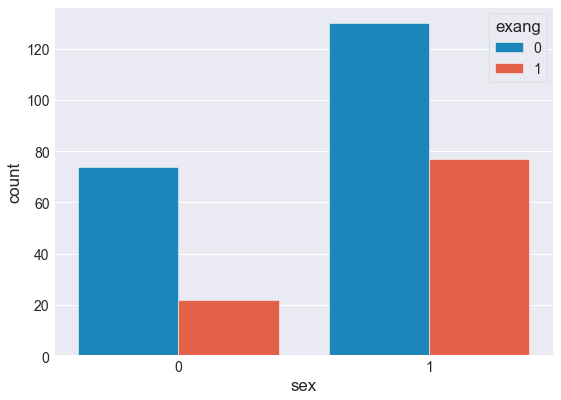

In [33]:
# Count Plot for "sex" & "exang"
print(df['sex'].value_counts())
print(df['exang'].value_counts())
plt.figure(figsize=(8,6))
sns.countplot(x='sex', hue='exang', data=df)

- exang ---> exercise induced angina (1 ---> Yes; 0 ---> No)

- sex   ---> (1 ---> Male; 0 ---> Female)

### f. Value Counts of "restecg" w.r.t "age"

1    152
0    147
2      4
Name: restecg, dtype: int64


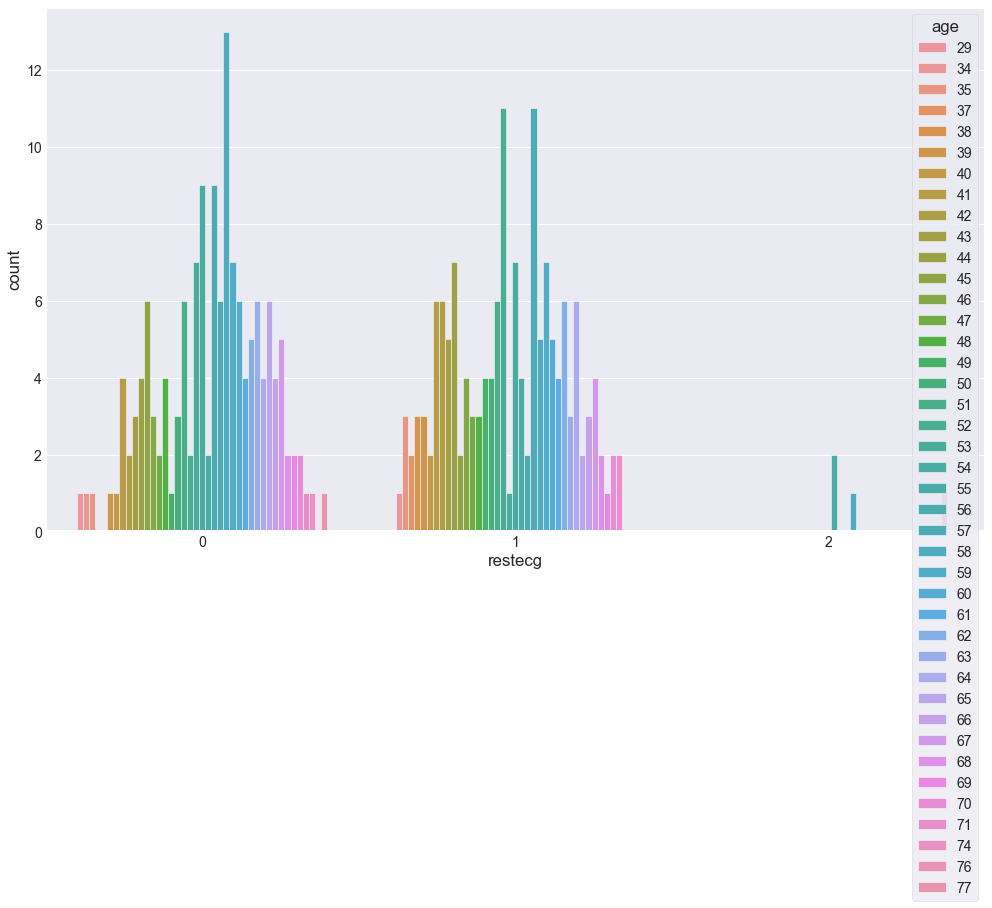

In [35]:
# Count Plot for "restecg : resting electrocardiographic results" & "age"
print(df['restecg'].value_counts())
plt.figure(figsize=(15,9))
sns.countplot(x='restecg', data=df, hue='age')

- restecg : resting electrocardiographic results shown based on age for 3 categories.

### g. Value Counts of "sex"  w.r.t  "age"

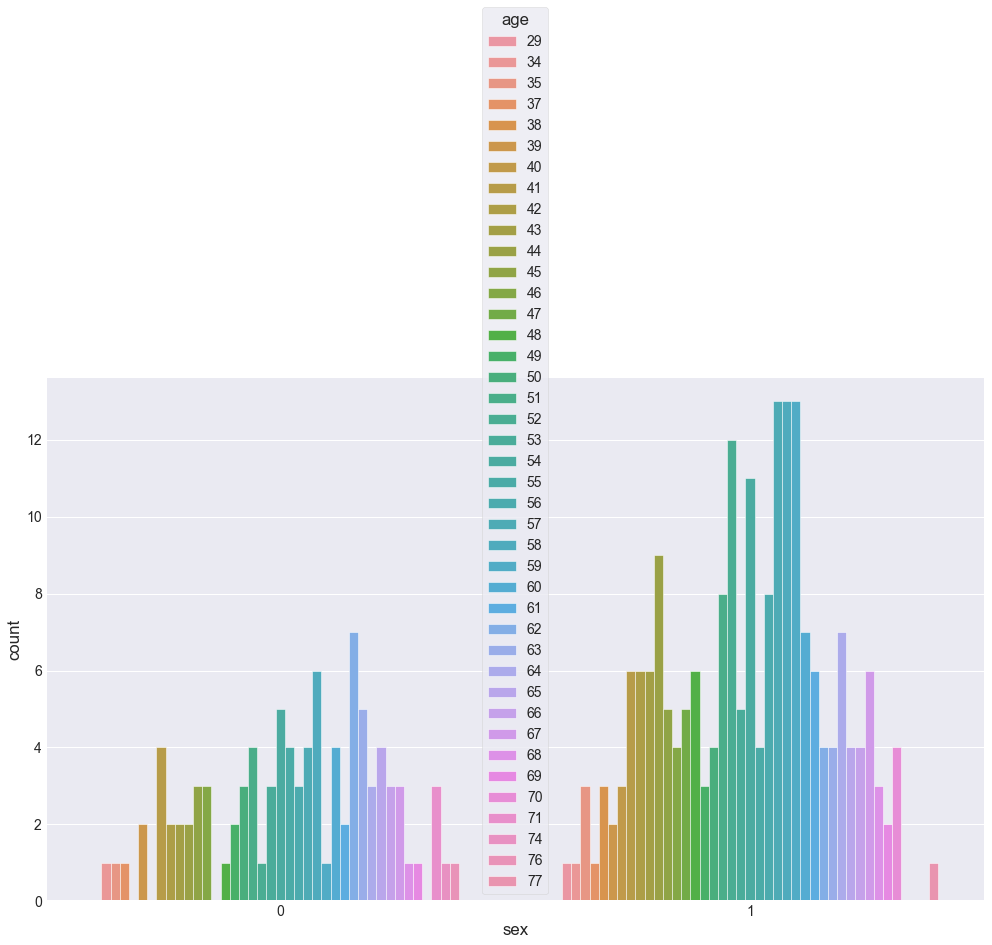

In [36]:
# Count Plot for "sex" & "age"
plt.figure(figsize=(15,9))
sns.countplot(x='sex', data=df, hue='age')

- sex (1 = male; 0 = female)


- Counts of male & female w.r.t age

### h. Value Counts of "slope" w.r.t "sex"

2    142
1    140
0     21
Name: slope, dtype: int64


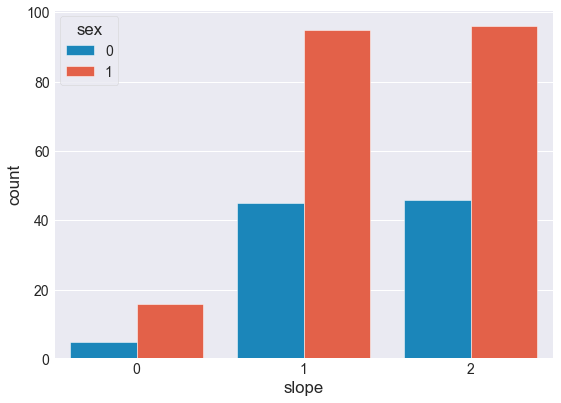

In [38]:
# Count plot of slope w.r.t sex
print(df['slope'].value_counts())
plt.figure(figsize=(8,6))
sns.countplot(x='slope', hue='sex', data=df)

- **upsloping** of **Male 17 and Female 4**

- **flat** of **Male 93 and Female 42**

- **downsloping** of **Male 97 and Female 45**

### i. Value Counts of "thal"  w.r.t  "cp"

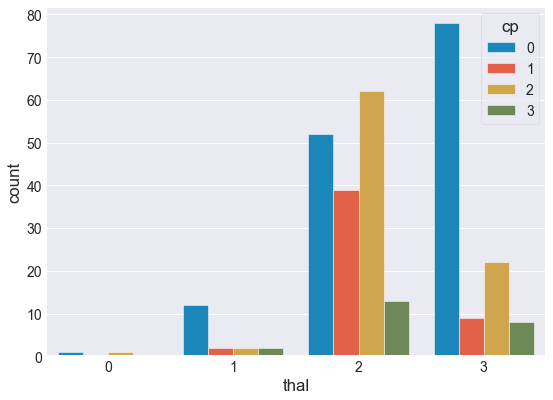

In [39]:
# Count plot of thal w.r.t cp
plt.figure(figsize=(8,6))
sns.countplot(x='thal', hue='cp', data=df)

### j. Pie Chart of "cp"  w.r.t  "target"

In [39]:
# Pie chart for Fatalities(Death)

fig = go.Figure(data=[go.Pie(labels=df['cp'], 
                      values=df['target'])]) 
  
fig.show()

### 3. Bivariate Analysis

- **Bivariate Analysis** : data involves **two different variables**.


     1. Bar Charts
     
     2. Scatter Plots
     
     3. FacetGrid


-  There are **three** types of bivariate analysis


     1. Numerical & Numerical
     
     2. Categorical & Categorical
     
     3. Numerical & Categorical

### Bar Chart : "Chest Pain" Vs "target"

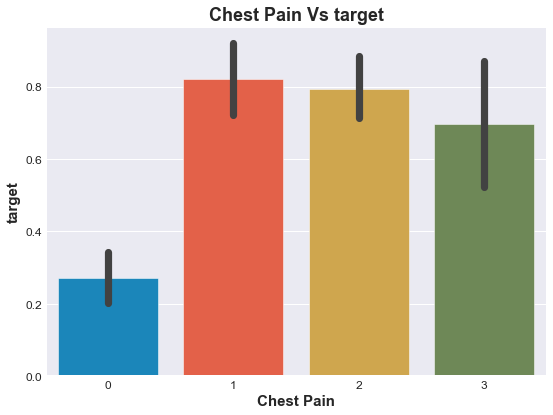

In [40]:
# Bar plot between "Chest Pain" & "target"
plt.figure(figsize=(8,6))
sns.barplot(x='cp', y='target', data=df)

plt.xlabel('Chest Pain', fontsize=15, fontweight='bold')
plt.ylabel('target', fontsize=15, fontweight='bold')

plt.title('Chest Pain Vs target', fontsize=18, fontweight='bold')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

### Scatter Plot : "Age" Vs "Chol"

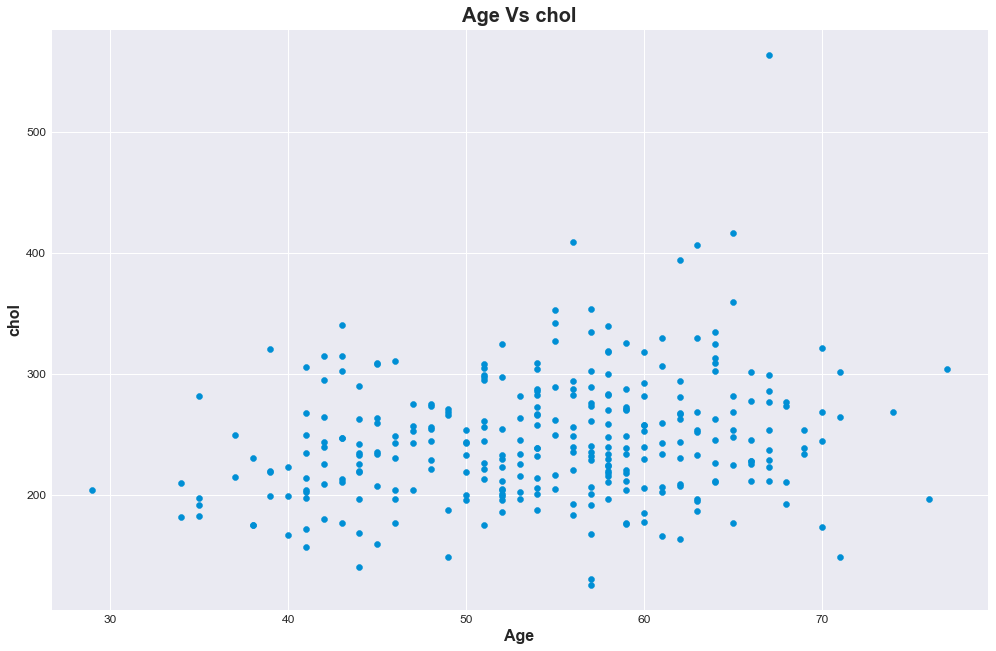

In [42]:
# Scatter plot between "Age" & "chol:Serum cholestoral"
plt.figure(figsize=(15,10))
plt.scatter(df['age'], df['chol'])

plt.xlabel('Age', fontsize=16, fontweight='bold')
plt.ylabel('chol', fontsize=16, fontweight='bold')

plt.title('Age Vs chol', fontsize=20, fontweight='bold')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

- Graph shows **outliers**

### Scatter Plot : "Age" Vs "Trestbps"

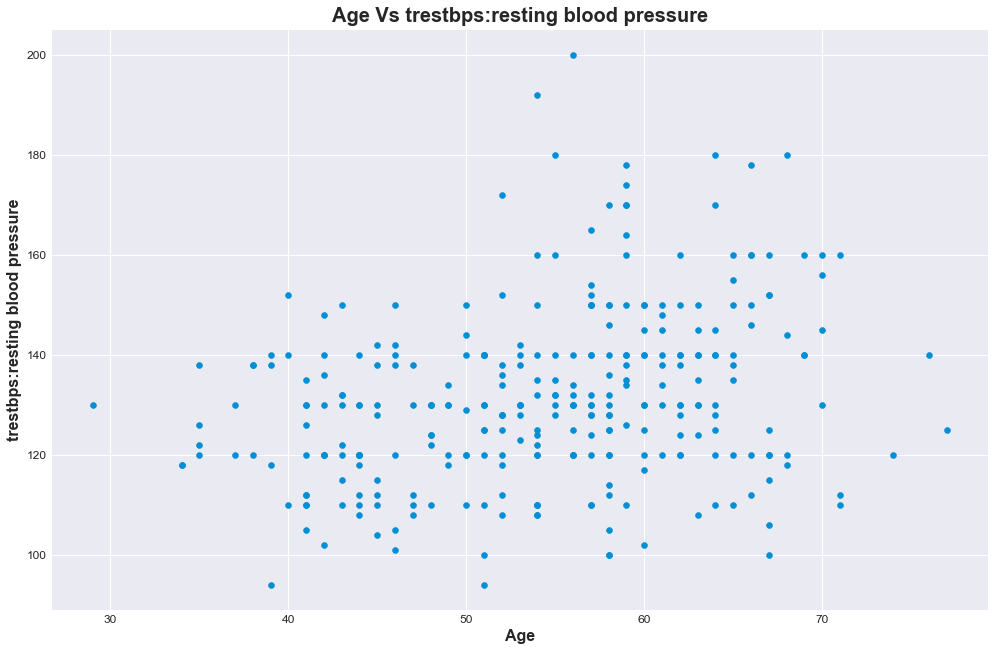

In [43]:
# Scatter plot between "trestbps:resting blood pressure" & "chol:Serum cholestoral"
plt.figure(figsize=(15,10))
plt.scatter(df['age'], df['trestbps'])

plt.xlabel('Age', fontsize=16, fontweight='bold')
plt.ylabel('trestbps:resting blood pressure', fontsize=16, fontweight='bold')

plt.title('Age Vs trestbps:resting blood pressure', fontsize=20, fontweight='bold')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

- Graph shows **outliers**

### Scatter Plot : "Trestbps" Vs "chol"

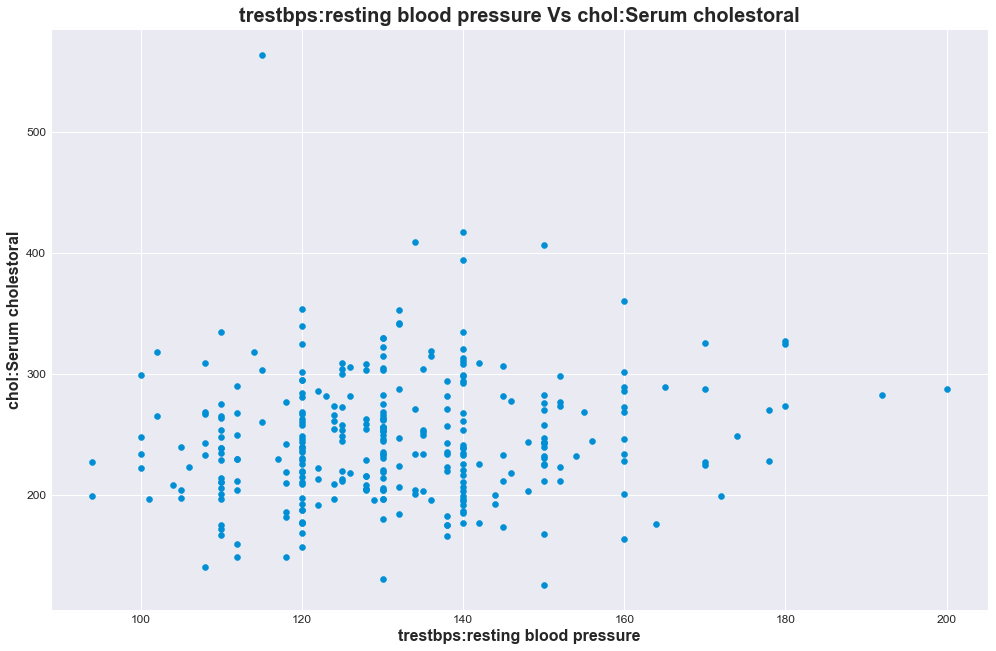

In [44]:
# Scatter plot between "trestbps:resting blood pressure" & "chol:Serum cholestoral"
plt.figure(figsize=(15,10))
plt.scatter(df['trestbps'], df['chol'])

plt.xlabel('trestbps:resting blood pressure', fontsize=16, fontweight='bold')
plt.ylabel('chol:Serum cholestoral', fontsize=16, fontweight='bold')

plt.title('trestbps:resting blood pressure Vs chol:Serum cholestoral', fontsize=20, fontweight='bold')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

- Graph shows **outliers**

### Box Plot

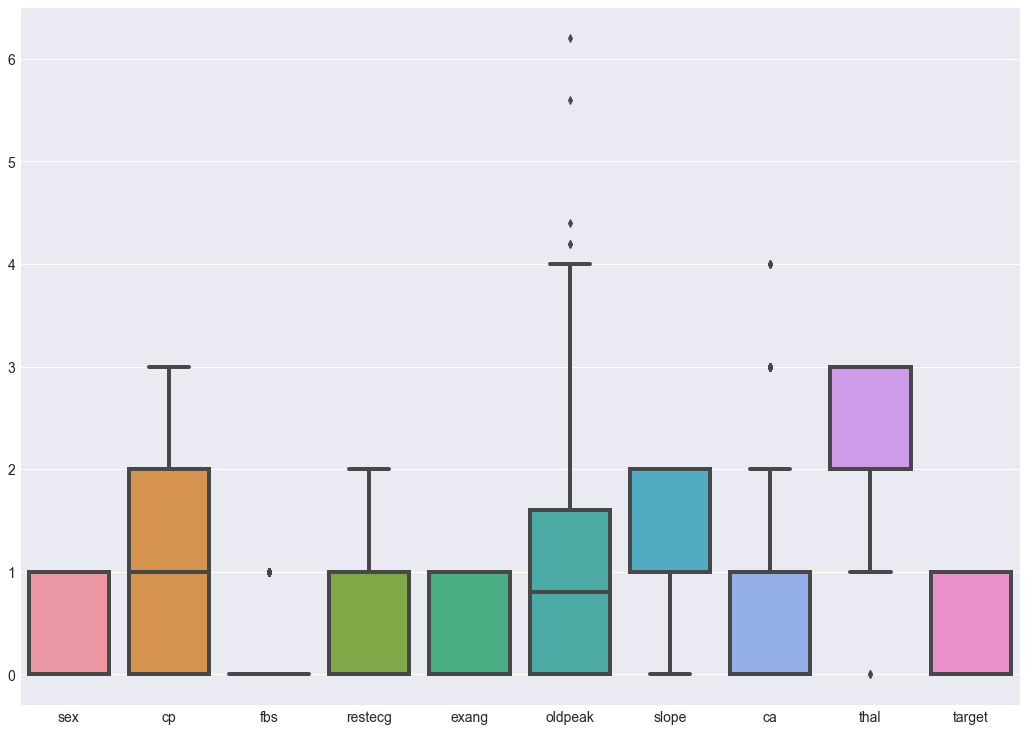

In [43]:
# Box plot created for features
plt.figure(figsize=(16,12))
sns.boxplot(data=df[['sex','cp','fbs','restecg','exang','oldpeak','slope','ca','thal','target']])

- From above graph found **outliers** in features : **"fbs", "oldpeak", "ca", "thal"**

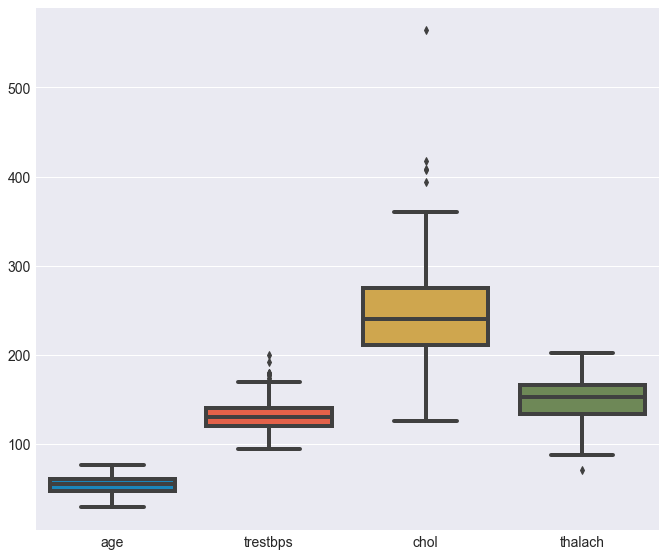

In [44]:
# Box plot created for features columns
plt.figure(figsize=(10,9))
sns.boxplot(data=df[['age','trestbps','chol','thalach']])

- From above graph found **outliers** in features : **"chol", "thalach"**

### CatPlot : "cp" & "thal"  w.r.t  "sex"

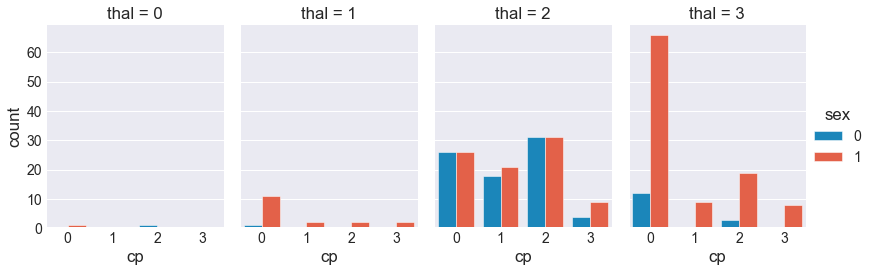

In [45]:
# Catplot to show Chest pain based on "thal" and "sex"
sns.catplot(x="cp", hue="sex", col="thal",
                data=df, kind="count",
                height=4, aspect=.7);

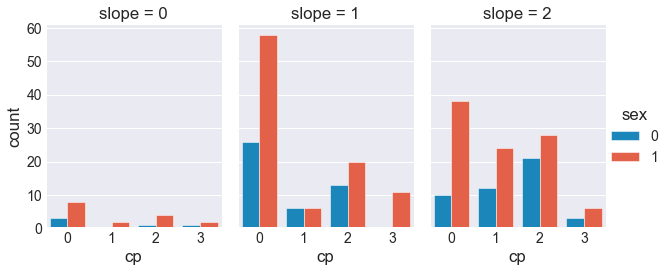

In [46]:
# Catplot to show Chest pain based on "thal" and "sex"
sns.catplot(x="cp", hue="sex", col="slope",
                data=df, kind="count",
                height=4, aspect=.7);

### FacetGrid

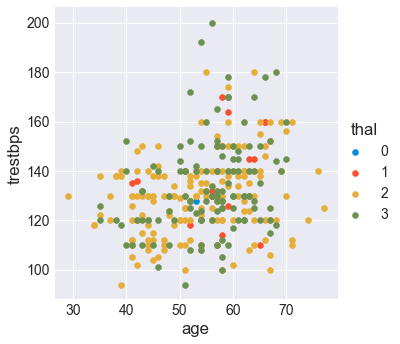

In [47]:
# FacetGrid
sns.FacetGrid(df, hue="thal", height=5).map(plt.scatter,"age","trestbps").add_legend();
plt.show()

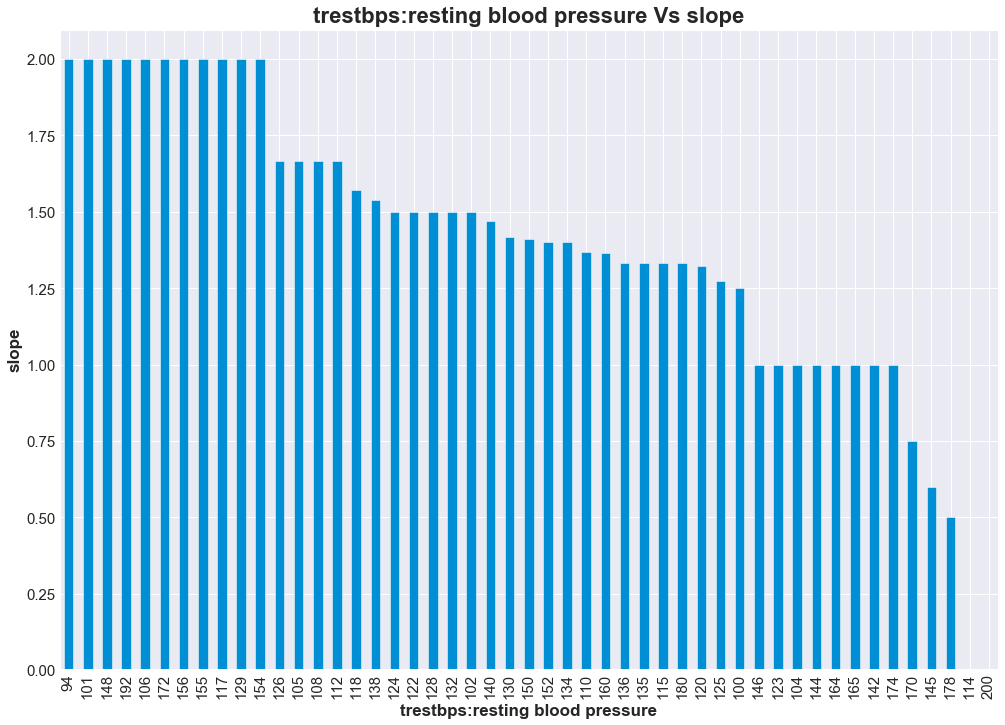

In [48]:
# Bar Chart for showing count of "trestbps:resting blood pressure" and "slope"
plt.figure(figsize=(15,11))

df.groupby('trestbps').mean().sort_values(by='slope', ascending=False)['slope'].plot(kind='bar')

plt.xlabel('trestbps:resting blood pressure', fontsize=17, fontweight = 'bold')
plt.ylabel('slope', fontsize=17, fontweight = 'bold')

plt.title('trestbps:resting blood pressure Vs slope', fontsize=22, fontweight = 'bold')

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.show()

### 3. Multivariate Analysis

- 1. Pair Plot

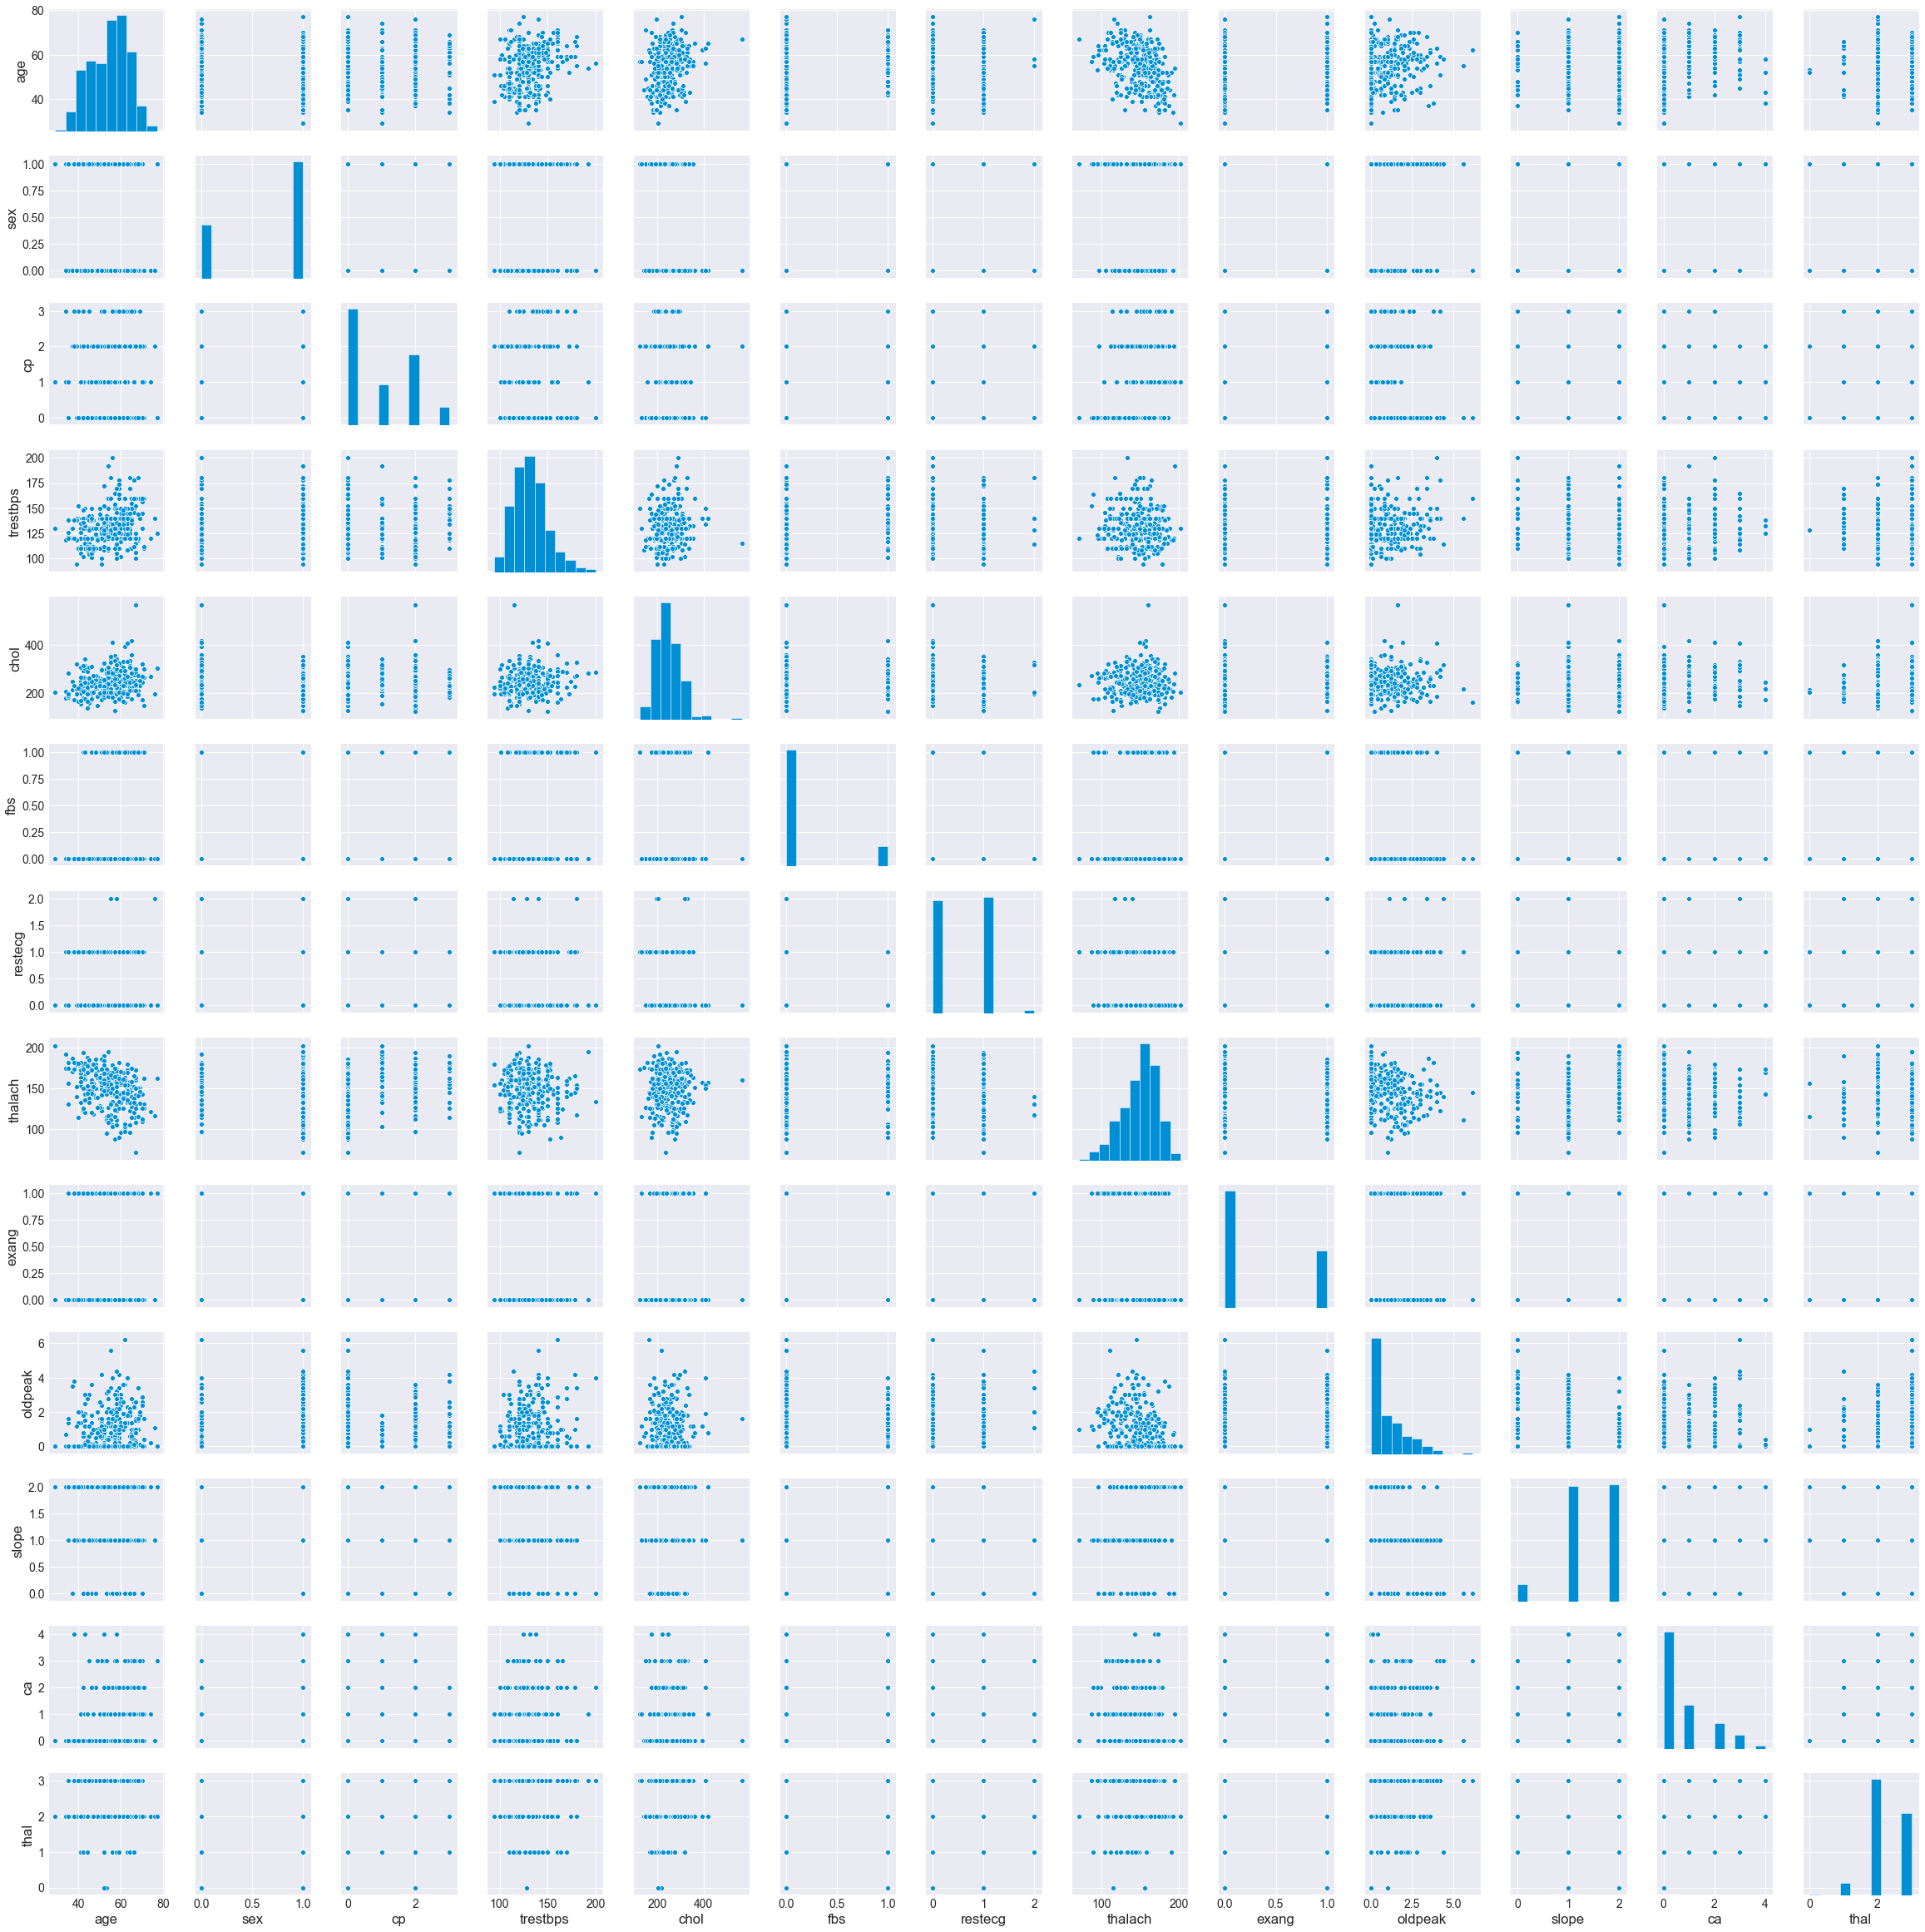

In [49]:
## Checking for pairplot
sns.pairplot(df.drop('target', axis=1))

<h2 style="color:blue" align="left"> 6. Detect outliers using IQR </h2>

In [119]:
df_IQR = df[['age','trestbps','chol','thalach']]
Q1 = df_IQR.quantile(0.25)
Q3 = df_IQR.quantile(0.75)
IQR = Q3 - Q1
IQR

age         13.5
trestbps    20.0
chol        63.5
thalach     32.5
dtype: float64

In [120]:
# Here are the outliers

df_IQR_clean = df_IQR[~((df_IQR < (Q1 - 1.5*IQR)) | (df_IQR > (Q3 + 1.5*IQR))).any(axis=1)]

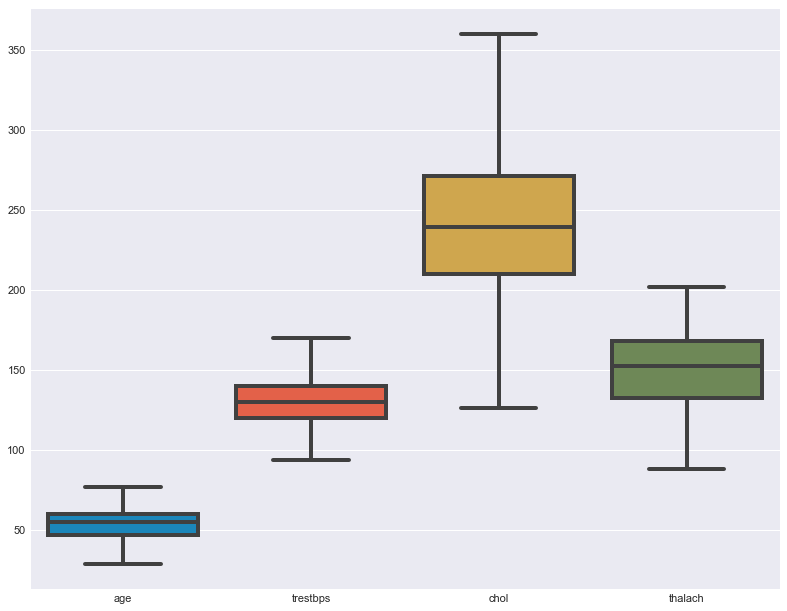

In [122]:
# boxplot() showing outlier
box = df_IQR_clean
plt.figure(figsize=(12,10))
sns.boxplot(data=box)
plt.show()

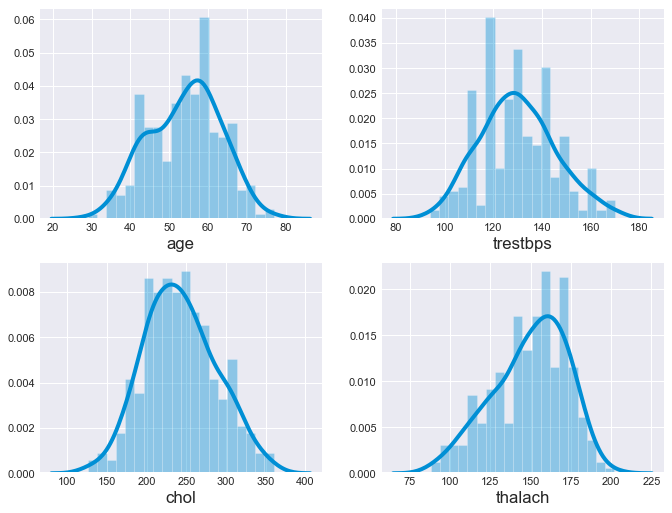

In [127]:
# distplot same as histogram
fig, ax = plt.subplots(2,2, figsize=(10,8))
sns.distplot(df_IQR_clean.age, bins = 20, ax=ax[0,0]) 
sns.distplot(df_IQR_clean.trestbps, bins = 20, ax=ax[0,1]) 
sns.distplot(df_IQR_clean.chol, bins = 20, ax=ax[1,0])
sns.distplot(df_IQR_clean.thalach, bins = 20, ax=ax[1,1])
plt.show()

<h2 style="color:blue" align="left"> 7. Check & Reduce Skewness </h2>

### a. Checking Skewness for feature "age"

In [50]:
# Checking the skewness of "age" attributes
df['age'].skew()

-0.2024633654856539

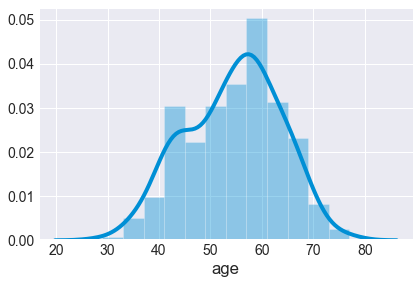

In [51]:
# plotting the histogram for  "age" attributes
sns.distplot(df['age'], hist=True)

- feature "age" is **right skewed.**

In [52]:
# calculating the square for the column df['age'] column
Square_age = np.square(df['age'])
Square_age

0      3969
1      1369
2      1681
3      3136
4      3249
       ... 
298    3249
299    2025
300    4624
301    3249
302    3249
Name: age, Length: 303, dtype: int64

In [53]:
# checking the skewness
Square_age.skew()

0.15634227492279207

- The thumb rule is: If the skewness is between **-0.5 to +0.5** then we can say data is **fairly symmetrical.**

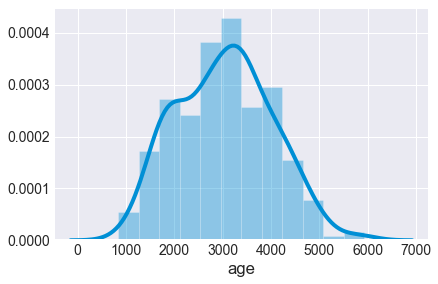

In [54]:
# plotting the density and histogram plot
sns.distplot(Square_age, hist=True)

### b. Checking Skewness for feature "trestbps"

In [55]:
# Checking the skewness of "trestbps" attributes
df['trestbps'].skew()

0.7137684379181465

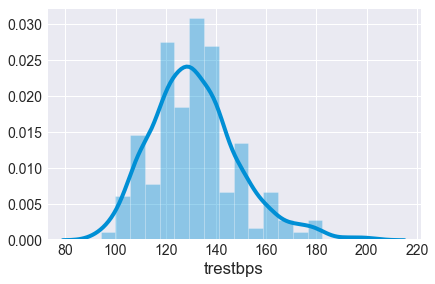

In [56]:
# plotting the histogram for  "trestbps" attributes
sns.distplot(df['trestbps'], hist=True)

- feature "trestbps" is **right skewed**.

In [57]:
# performing the log transformation using numpy
log_trestbps = np.log(df['trestbps'])
log_trestbps

0      4.976734
1      4.867534
2      4.867534
3      4.787492
4      4.787492
         ...   
298    4.941642
299    4.700480
300    4.969813
301    4.867534
302    4.867534
Name: trestbps, Length: 303, dtype: float64

In [58]:
# checking the skewness after the log-transformation
log_trestbps.skew()

0.2817574464672539

### c. Checking Skewness for feature "chol"

In [59]:
# Checking the skewness of "chol" attributes
df['chol'].skew()

1.1434008206693387

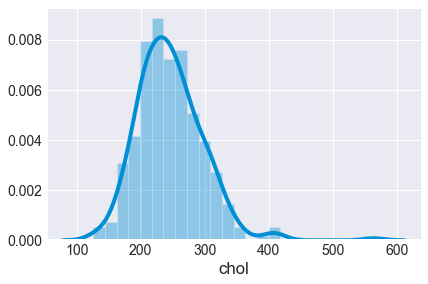

In [60]:
# plotting the histogram for  "chol" attributes
sns.distplot(df['chol'], hist=True)

- feature "trestbps" is **right skewed**.

In [61]:
# performing the log transformation using numpy
log_chol = np.log(df['chol'])
log_chol

0      5.451038
1      5.521461
2      5.318120
3      5.463832
4      5.869297
         ...   
298    5.484797
299    5.575949
300    5.262690
301    4.875197
302    5.463832
Name: chol, Length: 303, dtype: float64

In [62]:
# checking the skewness after the log-transformation
log_chol.skew()

0.08666713455435988

### d. Checking Skewness for feature "thalach"

In [63]:
# Checking the skewness of "thalach" attributes
df['thalach'].skew()

-0.5374096526832253

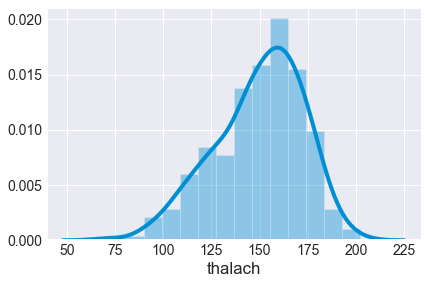

In [64]:
# plotting the histogram for  "thalach" attributes
sns.distplot(df['thalach'], hist=True)

- feature "thalach" is **left skewed**.

In [65]:
# calculating the square for the column df['thalach'] column
Square_thalach = np.power(df['thalach'],3)
Square_thalach

0      3375000
1      6539203
2      5088448
3      5639752
4      4330747
        ...   
298    1860867
299    2299968
300    2803221
301    1520875
302    5268024
Name: thalach, Length: 303, dtype: int64

In [66]:
# checking the skewness
Square_thalach.skew()

0.18034307083306292

### e. Checking Skewness for feature "target"

In [67]:
# Checking the skewness of "target" column of dataset
df['target'].skew()

-0.17982105403495655

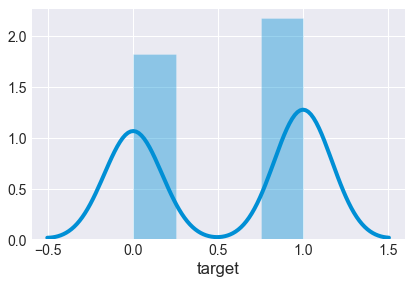

In [68]:
# density plot
sns.distplot(df['target'], hist = True)

- The thumb rule is: If the skewness is between **-0.5 to +0.5** then we can say data is **fairly symmetrical.**

<h2 style="color:blue" align="left"> 7. Model building and Evaluation </h2>

In [69]:
# Independant variable
X = df.iloc[:,0:-1].values         # All rows & columns exclude Target features

# Dependant variable
y = df.iloc[:,-1].values         # Only target feature

In [70]:
# split  data into training and testing sets of 70:30 ratio
# 30% of test size selected
# random_state is random seed
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=4)

In [1]:
# shape of X & Y test / train
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

NameError: name 'X_train' is not defined

<h3 style="color:green" align="left"> a. SVM (Support Vector Machine) </h3>

In [37]:
svm = svm.SVC(kernel="linear")      # Random Forest Classifier
svm.fit(X_train, y_train)           # train the model

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [38]:
# predicting X_test
pred_svm = svm.predict(X_test)
pred_svm

array([1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1], dtype=int64)

In [39]:
# Check for accuracy of prediction
svm.score(X_test, y_test)

0.9180327868852459

- **SVM** (Support Vector Machine) given accuracy of **91%.**

### classification Report

In [75]:
# classification Report
print(classification_report(y_test, pred_svm))

              precision    recall  f1-score   support

           0       0.92      0.88      0.90        25
           1       0.92      0.94      0.93        36

   micro avg       0.92      0.92      0.92        61
   macro avg       0.92      0.91      0.91        61
weighted avg       0.92      0.92      0.92        61



### Confusion Matrix

In [76]:
# Confusion Matrix
cf_matrix = confusion_matrix(y_test, pred_svm)
print('Confusion Matrix \n',cf_matrix)

Confusion Matrix 
 [[22  3]
 [ 2 34]]


- False Positive 22

- False Negative 3

- True Negative 2

- True Positive 34

### Confusion Matrix Heatmap

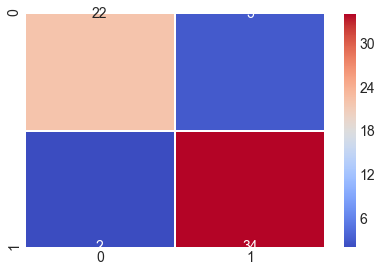

In [77]:
sns.heatmap(cf_matrix, cmap='coolwarm', annot=True, linewidth=1, fmt="d")
plt.show()
#sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, cmap='coolwarm', fmt='.1%', linewidth=1)

<h3 style="color:green" align="left"> b. Random Forest </h3>

In [72]:
model = RandomForestClassifier(n_estimators=200)  # Random Forest Classifier
model.fit(X_train, y_train)   # train the model

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [73]:
# predicting X_test
pred_model = model.predict(X_test)
pred_model

array([0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1], dtype=int64)

In [74]:
# Check for accuracy of prediction
model.score(X_test, y_test)

0.8852459016393442

- **Random Forest Classifier** given **accuracy of 88%.**

<h3 style="color:green" align="left"> c. Decision Tree Classifier </h3>

In [79]:
from sklearn.tree import DecisionTreeRegressor
DT = DecisionTreeRegressor()
DT.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [80]:
DT.predict(X_test)

array([0., 0., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1.,
       1., 0., 1., 1., 0., 0., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0.,
       0., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0.,
       1., 1., 1., 1., 1., 1., 0., 0., 0., 1.])

In [81]:
# Check for accuracy of prediction
DT.score(X_test, y_test)

0.2544444444444445

<h3 style="color:green" align="left"> d. KNN </h3>

In [82]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=1)
KNN.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [83]:
# Check for accuracy of prediction
KNN.score(X_test, y_test)

0.5409836065573771

<h3 style="color:green" align="left"> g. Logistic Regression </h3>

In [84]:
from sklearn.linear_model import LogisticRegression
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [85]:
LogReg.score(X_test, y_test)

0.9016393442622951

- Support Vector Machine Accuracy: 91.8%


- RandomForestClassifier Accuracy: 88.52%


- DecisionTreeClassifier Accuracy: 25.44%


- KNN (K Nearest Neighbour) : 54.09%


- LogisticRegression Accuracy: 90.16%



- So we can decide that **Support Vector Machine** is the best model for this dataset & its **accuracy 91.8%**

<h3 style="color:green" align="left"> b. Standard Scaler </h3>

In [40]:
sc = StandardScaler()                         # StandardScaler() use for value transform
X_train_Scaled = sc.fit_transform(X_train)    # fit_transform() :calculate mean & standard deviation for each column & transform
X_test_Scaled  = sc.transform(X_test)         # transform() :uses standardization formula ---> z = xi-mean / standard deviation

In [43]:
svm = svm.SVC(kernel="linear")             # Random Forest Classifier
svm.fit(X_train_Scaled, y_train)           # train the model

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [45]:
# predicting X_test
pred_model = svm.predict(X_test_Scaled)
pred_model

array([1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1], dtype=int64)

In [46]:
# Check for accuracy of prediction
svm.score(X_test_Scaled, y_test)

0.9016393442622951

- After applying **Standard Scalar** accuracy decreased from **91% to 90%** 

<h3 style="color:green" align="left"> ROC Curve with Support Vector Machine </h3>

In [86]:
y_prob = svm.predict_proba(X_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test, y_prob)
Auc = auc(fpr, tpr)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, linestyle='-', label='(auc=%0.3f)'  %Auc)
plt.plot([0,1],[0,1])
plt.title('ROC CURVE')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

AttributeError: module 'sklearn.svm' has no attribute 'predict_proba'

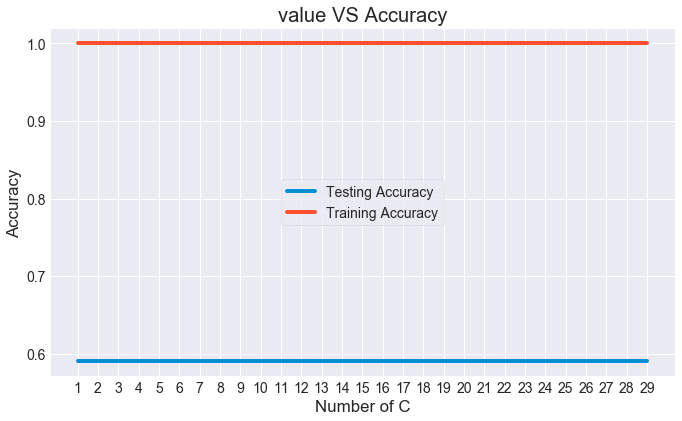

Best accuracy is 0.5901639344262295 with C = 1


In [87]:
num = np.arange(1, 30)
train_accuracy = []
test_accuracy = []
for i, k in enumerate(num):
    svm = SVC(C=k)
    svm.fit(X_train, y_train)
    train_accuracy.append(svm.score(X_train, y_train))
    test_accuracy.append(svm.score(X_test, y_test))

# Plot
plt.figure(figsize=(10,6))
plt.plot(num, test_accuracy, label = 'Testing Accuracy')
plt.plot(num, train_accuracy, label = 'Training Accuracy')
plt.legend(loc=10)
plt.title('value VS Accuracy')
plt.xlabel('Number of C')
plt.ylabel('Accuracy')
plt.xticks(num)
plt.show()
print("Best accuracy is {} with C = {}".format(np.max(test_accuracy),
                                               1+test_accuracy.index(np.max(test_accuracy))))